In [0]:
import numpy as np
import pandas as pd
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
data_frame = pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))

In [6]:
data_frame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
data_numpy=data_frame.values

In [8]:
data_numpy

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [0]:
train_data=data_numpy[:,:-1]

In [10]:
train_data.shape

(768, 8)

In [0]:
train_labels=data_numpy[:,-1]

In [12]:
train_labels.shape

(768,)

In [13]:
type(train_labels)

numpy.ndarray

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [15]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [16]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 25
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=25, verbose=1)
  val_loss, val_accuracy = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_accuracy)


processing fold # 0
Epoch 1/25
576/576 [==============================] - 1s 1ms/step - loss: 0.6446 - acc: 0.6215
Epoch 2/25
576/576 [==============================] - 0s 101us/step - loss: 0.5345 - acc: 0.7569
Epoch 3/25
576/576 [==============================] - 0s 123us/step - loss: 0.4856 - acc: 0.7795
Epoch 4/25
576/576 [==============================] - 0s 85us/step - loss: 0.4637 - acc: 0.7847
Epoch 5/25
576/576 [==============================] - 0s 86us/step - loss: 0.4536 - acc: 0.7812
Epoch 6/25
576/576 [==============================] - 0s 88us/step - loss: 0.4442 - acc: 0.7847
Epoch 7/25
576/576 [==============================] - 0s 87us/step - loss: 0.4394 - acc: 0.7969
Epoch 8/25
576/576 [==============================] - 0s 80us/step - loss: 0.4393 - acc: 0.7986
Epoch 9/25
576/576 [==============================] - 0s 78us/step - loss: 0.4361 - acc: 0.7986
Epoch 10/25
576/576 [==============================] - 0s 74us/step - loss: 0.4314 - acc: 0.7951
Epoch 11/25
576/57

In [17]:
all_scores

[0.7604166666666666, 0.71875, 0.8020833333333334, 0.7916666666666666]

In [18]:
model = build_model()
history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=25, verbose=1)
  

Epoch 1/25
576/576 [==============================] - 1s 885us/step - loss: 0.6369 - acc: 0.6667
Epoch 2/25
576/576 [==============================] - 0s 71us/step - loss: 0.5360 - acc: 0.7448
Epoch 3/25
576/576 [==============================] - 0s 74us/step - loss: 0.4928 - acc: 0.7656
Epoch 4/25
576/576 [==============================] - 0s 72us/step - loss: 0.4749 - acc: 0.7656
Epoch 5/25
576/576 [==============================] - 0s 81us/step - loss: 0.4637 - acc: 0.7760
Epoch 6/25
576/576 [==============================] - 0s 78us/step - loss: 0.4567 - acc: 0.7847
Epoch 7/25
576/576 [==============================] - 0s 79us/step - loss: 0.4519 - acc: 0.7812
Epoch 8/25
576/576 [==============================] - 0s 73us/step - loss: 0.4494 - acc: 0.7830
Epoch 9/25
576/576 [==============================] - 0s 75us/step - loss: 0.4440 - acc: 0.7830
Epoch 10/25
576/576 [==============================] - 0s 81us/step - loss: 0.4473 - acc: 0.7813
Epoch 11/25
576/576 [=================

In [27]:
history.history["acc"]

[0.6666666728237437,
 0.7447916678049498,
 0.7656250010348029,
 0.7656249984477957,
 0.7760416707023978,
 0.7847222205665376,
 0.7812499964816703,
 0.7829861162851254,
 0.7829861016944051,
 0.7812500016556846,
 0.7829861111111112,
 0.7934027781916989,
 0.788194444651405,
 0.7743055586599641,
 0.7951388824731112,
 0.802083333229853,
 0.8003472211874194,
 0.7968750022765663,
 0.7986111100763083,
 0.805555549553699,
 0.8020833319363495,
 0.8038194452722868,
 0.8090277762255735,
 0.8090277710515592,
 0.8124999977234337]

In [32]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=30, verbose=1)
  all_scores.append(history.history["acc"])


processing fold # 0
Epoch 1/500
576/576 [==============================] - 1s 1ms/step - loss: 0.6454 - acc: 0.6701
Epoch 2/500
576/576 [==============================] - 0s 69us/step - loss: 0.5597 - acc: 0.7188
Epoch 3/500
576/576 [==============================] - 0s 69us/step - loss: 0.5045 - acc: 0.7656
Epoch 4/500
576/576 [==============================] - 0s 70us/step - loss: 0.4728 - acc: 0.7743
Epoch 5/500
576/576 [==============================] - 0s 73us/step - loss: 0.4579 - acc: 0.7830
Epoch 6/500
576/576 [==============================] - 0s 72us/step - loss: 0.4445 - acc: 0.7951
Epoch 7/500
576/576 [==============================] - 0s 73us/step - loss: 0.4401 - acc: 0.7986
Epoch 8/500
576/576 [==============================] - 0s 70us/step - loss: 0.4361 - acc: 0.7882
Epoch 9/500
576/576 [==============================] - 0s 74us/step - loss: 0.4315 - acc: 0.7934
Epoch 10/500
576/576 [==============================] - 0s 74us/step - loss: 0.4308 - acc: 0.7865
Epoch 11/5

In [0]:
average_acc_history = [
np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

In [34]:
len(average_acc_history)

500

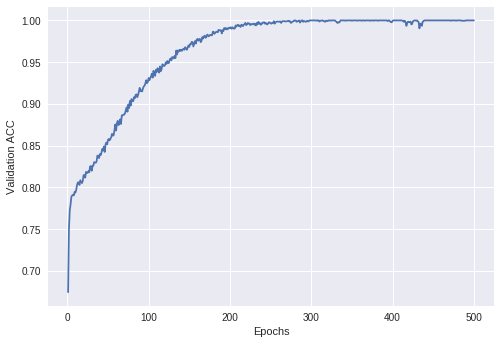

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation ACC')
plt.show()